In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [4]:
df = pd.read_excel("./data/MAP_sample.xlsx", index_col="id")

In [5]:
df.head()

,value
id,
1,3.896195
2,5.865766
3,5.860887
4,4.660614
5,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

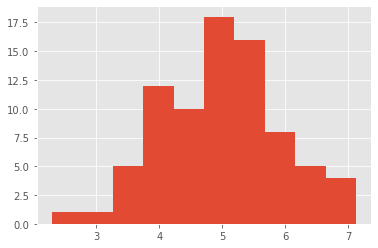

In [6]:
plt.hist(df["value"])

In [8]:
def likelihood(mu, *args):
    """尤度関数（本来は尤度関数の確率の積だが、計算簡単にするために-log10取って和をとってる）"""
    # stats.norm.pdfは正規分布確の率密度関数
    # norm.pdf(x=1.0, loc=0, scale=1) なら、期待値loc，標準偏差scaleの正規分布の確率密度関数のx=1.0での値を取得
    # 推定する事後分布のパラメータ=平均値:μ, argsは事後分布の期待値（実際のデータのこと）として尤度関数（確率値）計算
    li = -np.log10(stats.norm.pdf(mu, loc=args))
    return(np.sum(li))

In [9]:
# 尤度関数を最小化する事後分布のパラメータ=平均値:μ。初期値=1として実行
optimize.minimize(likelihood, 1, args=df["value"])

      fun: 47.65549318887928
 hess_inv: array([[0.02878231]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.97609903])

x: array([4.97609903])が事後分布のパラメータ=平均値:μ  
ヒストグラムでも平均値は5付近なので合ってそう